<a href="https://colab.research.google.com/github/Himanshusing212/BHARAT-INTERN/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT 1
## STOCK PRICE PREDICTION USING LSTM METHOD

---


DATA : MICROSOFT STOCK PRICES



Author : Himanshu Singh


In [2]:
import pandas as pd
df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9430,2023-08-14,321.390015,324.059998,320.079987,324.040009,323.355408,18836100
9431,2023-08-15,323.000000,325.089996,320.899994,321.859985,321.179962,16966300
9432,2023-08-16,320.799988,324.420013,319.799988,320.399994,320.399994,20698900
9433,2023-08-17,320.540009,321.869995,316.209991,316.880005,316.880005,21257200


In [3]:
# we are going to use prediction on closed price
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9430,2023-08-14,324.040009
9431,2023-08-15,321.859985
9432,2023-08-16,320.399994
9433,2023-08-17,316.880005


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year,month,day = int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year = year, month = month, day = day)




In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-5-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9430   2023-08-14
9431   2023-08-15
9432   2023-08-16
9433   2023-08-17
9434   2023-08-18
Name: Date, Length: 9435, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-08-14,324.040009
2023-08-15,321.859985
2023-08-16,320.399994


Text(0.5, 1.0, 'CLOSE PRICE')

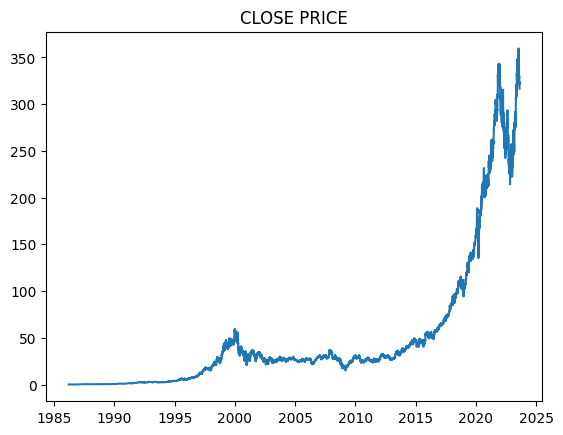

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])
plt.title('CLOSE PRICE')

In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df,
                                '2022-08-22	',
                                '2023-08-18',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-22,291.320007,290.170013,286.149994,277.750000
1,2022-08-23,290.170013,286.149994,277.750000,276.440002
2,2022-08-24,286.149994,277.750000,276.440002,275.790009
3,2022-08-25,277.750000,276.440002,275.790009,278.850006
4,2022-08-26,276.440002,275.790009,278.850006,268.089996
...,...,...,...,...,...
245,2023-08-14,322.230011,322.929993,321.010010,324.040009
246,2023-08-15,322.929993,321.010010,324.040009,321.859985
247,2023-08-16,321.010010,324.040009,321.859985,320.399994
248,2023-08-17,324.040009,321.859985,320.399994,316.880005


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

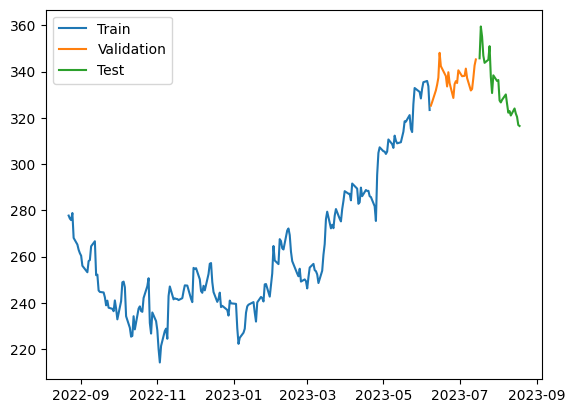

In [10]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 107ms/step - loss: 69244.4688 - mean_absolute_error: 261.5836 - val_loss: 112846.7891 - val_mean_absolute_error: 335.8847
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 68981.5625 - mean_absolute_error: 261.0790 - val_loss: 112510.0078 - val_mean_absolute_error: 335.3830
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 68635.1016 - mean_absolute_error: 260.4182 - val_loss: 111942.1797 - val_mean_absolute_error: 334.5354
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 68169.6172 - mean_absolute_error: 259.5197 - val_loss: 111281.3516 - val_mean_absolute_error: 333.5463
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 67685.8906 - mean_absolute_error: 258.5880 - val_loss: 110691.3438 - val_mean_absolute_error: 332.6606
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 67215.8906 - mean_absolute_error: 257.6732 - val_loss

7/7 [==============================] - 1s 4ms/step


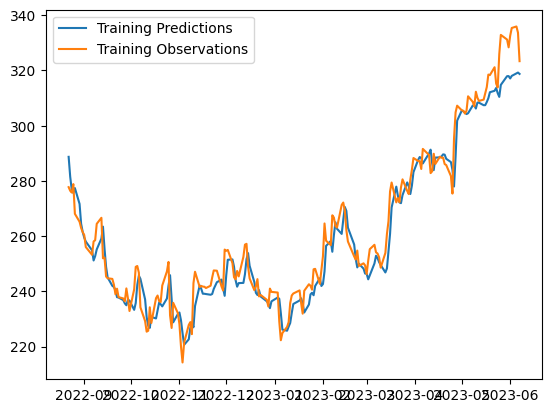

In [12]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 36ms/step


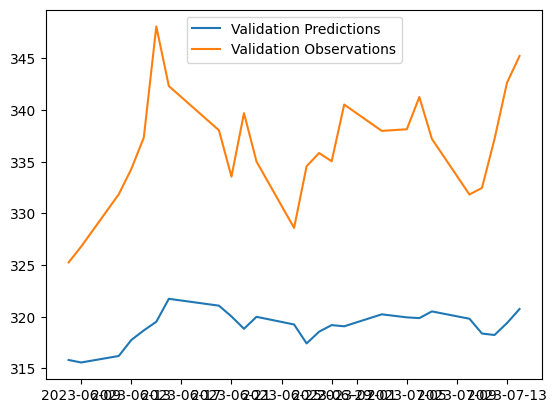

In [13]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 37ms/step


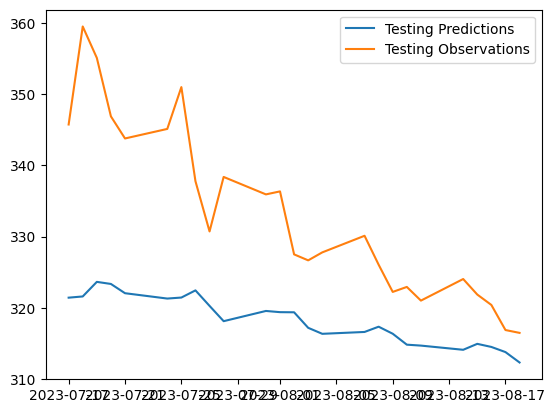

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

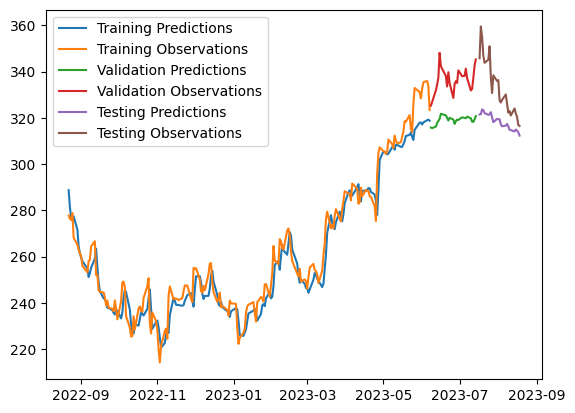

In [15]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])